In [1]:
# 1

import csv

a = []

with open('lab1.csv', 'r') as csvfile:
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\n The total number of training instances are : ",len(a))

num_attribute = len(a[0])-1
h = ['0']*num_attribute
print("\n The initial h is : \n", h)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        for j in range(0, num_attribute):
            if h[j] == '0' or h[j] == a[i][j]:
                h[j] = a[i][j]
            else:
                h[j] = '?'
    print(f"\n The h for the training instance {i+1} is: \n",h)

print("\n The Maximally specific h for the training instances is: \n", h )


[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'], ['sunny', 'warm', 'high', 'strong', 'warm', 'change', 'no'], ['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']]

 The total number of training instances are :  4

 The initial h is : 
 ['0', '0', '0', '0', '0', '0']

 The h for the training instance 1 is: 
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The h for the training instance 2 is: 
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The h for the training instance 3 is: 
 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']

 The h for the training instance 4 is: 
 ['sunny', 'warm', '?', 'strong', '?', '?']

 The Maximally specific h for the training instances is: 
 ['sunny', 'warm', '?', 'strong', '?', '?']


In [22]:
# 2 new
import csv 


with open("lab2.csv") as f: 
    csv_file = csv.reader(f) 
    data = list(csv_file) 


specific = data[1][:-1]  
general = [['?' for _ in range(len(specific))] for _ in range(len(specific))]

print(specific)
print(general)

for i in data: 
    if i[-1] == "yes":  
        for j in range(len(specific)): 
            if i[j] != specific[j]: 
                specific[j] = "?" 
                general[j][j] = "?" 
    elif i[-1] == "no":  
        for j in range(len(specific)): 
            if i[j] != specific[j]: 
                general[j][j] = specific[j] 
            else: 
                general[j][j] = "?" 
    
    
    print(f"\nStep {data.index(i)+1} of Candidate Elimination Algorithm") 
    print("Specific hypothesis: ", specific) 
    print("General hypothesis: ", general) 
    

gh = []  
for i in general: 
    for j in i: 
        if j != '?': 
            gh.append(i) 
            break 
    

print("\nFinal Specific hypothesis:\n", specific) 
print("\nFinal General hypothesis:\n", gh)


['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 1 of Candidate Elimination Algorithm
Specific hypothesis:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
General hypothesis:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
Specific hypothesis:  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
General hypothesis:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
Specific hypothesis:  ['sunny', 'warm', '?',

In [23]:
# 3
import math
import pandas as pd
from operator import itemgetter
    
class DecisionTree:
    def __init__(self, df, target, positive, parent_val=None, parent=None):
        self.data = df
        self.target = target
        self.positive = positive
        self.parent_val = parent_val
        self.parent = parent
        self.childs = []
        self.decision = None
    
    def _get_entropy(self, data):
        p = sum(data[self.target] == self.positive)
        n = data.shape[0] - p
        p_ratio = p / (p + n) if (p + n) != 0 else 0
        n_ratio = 1 - p_ratio
        entropy_p = -p_ratio * math.log2(p_ratio) if p_ratio != 0 else 0
        entropy_n = -n_ratio * math.log2(n_ratio) if n_ratio != 0 else 0
        return entropy_p + entropy_n
    
    def _get_gain(self, feat):
        avg_info = 0
        for val in self.data[feat].unique():
            subset = self.data[self.data[feat] == val]
            avg_info += self._get_entropy(subset) * len(subset) / self.data.shape[0]
        return self._get_entropy(self.data) - avg_info
    
    def _get_splitter(self):
        self.splitter = max(self.gains, key=itemgetter(1))[0]
    
    def update_nodes(self):
        self.features = [col for col in self.data.columns if col != self.target]
        self.entropy = self._get_entropy(self.data)
        if self.entropy != 0:
            self.gains = [(feat, self._get_gain(feat)) for feat in self.features]
            self._get_splitter()
            residual_columns = [k for k in self.data.columns if k != self.splitter]
            for val in self.data[self.splitter].unique():
                df_tmp = self.data[self.data[self.splitter] == val][residual_columns]
                tmp_node = DecisionTree(df_tmp, self.target, self.positive, val, self.splitter)
                tmp_node.update_nodes()
                self.childs.append(tmp_node)
        else:
            self.decision = self.data[self.target].iloc[0]
    
def print_tree(n, level=0):
    if n.parent is not None:
        indent = " " * level
        decision = f"(Decision: {n.decision})" if n.decision is not None else ""
        print(f"{indent}{n.parent}: {n.parent_val} {decision}")
    for child in n.childs:
        if child:
            print_tree(child, level + 1)
    
df = pd.read_csv('PlayTennis.csv')  
    
dt = DecisionTree(df, 'Play', 'Yes')  
dt.update_nodes()  
print_tree(dt)  
    

 Outlook: Sunny 
  Humidity: High (Decision: No)
  Humidity: Normal (Decision: Yes)
 Outlook: Overcast (Decision: Yes)
 Outlook: Rain 
  Wind: Weak (Decision: Yes)
  Wind: Strong (Decision: No)


In [52]:
# 4
import numpy as np
X=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)

X=X/np.amax(X,axis=0)
y=y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivatives_sigmoid(x):
    return x*(1-x)

epoch=5000
lr=0.1

inputlayer_neurons=2
hiddenlayer_neurons=3
output_neurons=1

wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):
    hinpl=np.dot(X,wh)+bh
    hlayer_act=sigmoid(hinpl)

    outinpl=np.dot(hlayer_act,wout)+bout
    output=sigmoid(outinpl)

    # till this is enough

    EO=y-output
    outgrad=EO*derivatives_sigmoid(output)

    EH=outgrad.dot(wout.T)
    hiddengrad=EH*derivatives_sigmoid(hlayer_act)

    wout+=hlayer_act.T.dot(outgrad)*lr
    wh+=X.T.dot(hiddengrad)*lr

    # the code above is to improve some accuracy
    
print("Input: \n"+str(X))
print("Actual output: \n"+str(y))
print("Predicted Output: \n",output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89353876]
 [0.87945808]
 [0.89682044]]


In [10]:
# 5
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv('PlayTennis.csv')
print("The first 5 values of data is :\n",data.head())

X = data.iloc[:,:-1]
print("\nThe First 5 values of train data is\n",X.head())

y = data.iloc[:,-1]
print("\nThe first 5 values of Train output is\n",y.head())

le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)
le_temperature = LabelEncoder()
X.Temperature = le_temperature.fit_transform(X.Temperature)
le_humidity = LabelEncoder()
X.Humidity = le_humidity.fit_transform(X.Humidity)
le_wind = LabelEncoder()
X.Wind = le_wind.fit_transform(X.Wind)
print("\nNow the Train data is :\n",X.head())

le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_pred))

The first 5 values of data is :
     Outlook Temperature Humidity    Wind Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes

The First 5 values of train data is
     Outlook Temperature Humidity    Wind
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The first 5 values of Train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Play, dtype: object

Now the Train data is :
    Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0         1     1

Now the Train output is
 [0 0

C:\Users\Amaan M k\AppData\Local\Temp\ipykernel_16888\1449757904.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Outlook = le_outlook.fit_transform(X.Outlook)
C:\Users\Amaan M k\AppData\Local\Temp\ipykernel_16888\1449757904.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Temperature = le_temperature.fit_transform(X.Temperature)
C:\Users\Amaan M k\AppData\Local\Temp\ipykernel_16888\1449757904.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [1]:
# 6
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?',np.nan)

print('Few examples from the dataset are given below')
print(heartDisease.head())
print(heartDisease.columns)


"""
"age" influences "trestbps" (resting blood pressure) and "fbs" (fasting blood sugar).
"sex" influences "trestbps".
"exang" (exercise induced angina) influences "trestbps".
"trestbps" influences "target" (presence or absence of heart disease).
"fbs" influences "target".
"target" influences "restecg" (resting electrocardiographic recording result), "thalach" (maximum heart rate achieved), and "chol" (serum cholesterol)."""
model = BayesianNetwork([
 ('age', 'trestbps'),
 ('age', 'fbs'),
 ('sex', 'trestbps'),
 ('exang', 'trestbps'),
 ('trestbps', 'target'),
 ('fbs', 'target'),
 ('target', 'restecg'),
 ('target', 'thalach'),
 ('target', 'chol')
])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

print('\n Inferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

print('\nAvailable states for age:')
age_states = heartDisease['age'].unique()
print(age_states)

print('\n 1. Probability of HeartDisease given Age=37')
q=HeartDisease_infer.query(variables=['target'],evidence={'age':37})
print("Age: ",q)

print('\nAvailable states for chol:')
chol_states = heartDisease['chol'].unique()
print(chol_states)

print('\n 2. Probability of HeartDisease given cholesterol=250')
q=HeartDisease_infer.query(variables=['target'],evidence={'chol':250})
print("Chol: ",q)

Few examples from the dataset are given below
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Learning CPD using Maximum likelihood estimators

 Inferencing with Bayesian Network:

Available states for age:
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 7

c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


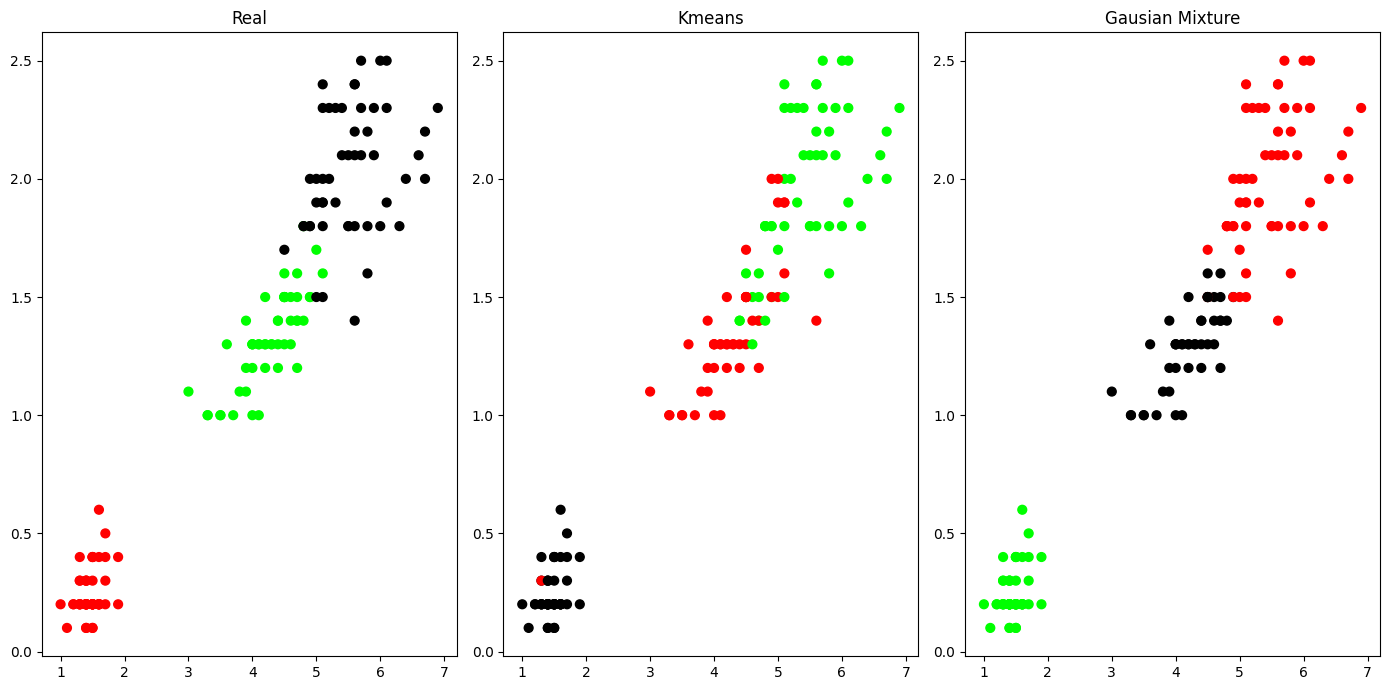

In [77]:
# 7
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

dataset = load_iris()
X= dataset.data
X1, X2= X[:, 2], X[:, 3]
y= dataset.target
# Access petal length and width directly: 2 & 3

plt.figure(figsize= (14, 7))
colormap = np.array(['red', 'lime', 'black']) 

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

# real
plt.subplot(1, 3, 1)
plt.scatter(X1, X2, c= colormap[y], s= 40)
plt.title("Real")

# Kmeans
kmeans = KMeans(n_clusters= 3)
kmeans.fit(X_scaled)
plt.subplot(1, 3, 2)
plt.scatter(X1, X2, c= colormap[kmeans.labels_], s= 40)
plt.title("Kmeans")

# Gaussian Mixture
gmm = GaussianMixture(n_components= 3)
gmm.fit(X_scaled)
y_pred_gmm = gmm.predict(X_scaled)
plt.subplot(1, 3, 3)
plt.scatter(X1, X2, c= colormap[y_pred_gmm], s= 40)
plt.title("Gausian Mixture")

plt.tight_layout()

In [5]:
# 8
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import numpy as np 
 
dataset=load_iris() 

X_train,X_test,y_train,y_test=train_test_split(dataset.data,dataset.target,random_state=0) 
 
kn=KNeighborsClassifier(n_neighbors=1) 
kn.fit(X_train,y_train) 
 
for i in range(len(X_test)): 
  prediction=kn.predict(np.array([X_test[i]])) 
  print("TARGET=",y_test[i],dataset.target_names[y_test[i]],"PREDICTED=",prediction,dataset.target_names[prediction]) 

print(kn.score(X_test,y_test))

TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 2 virginica PREDICTED= [2] ['virginica']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 1 versicolor PREDICTED= [1] ['versicolor']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 0 setosa PREDICTED= [0] ['setosa']
TARGET= 2 virginica PREDICTED= [2] [

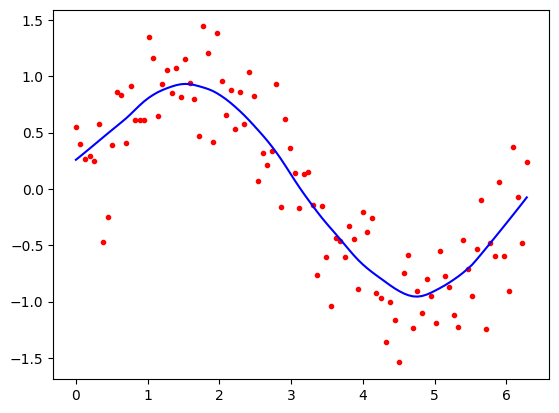

In [7]:
# 9
from math import ceil 
import numpy as np 
from scipy import linalg 
 
def lowess(x, y, f, iterations): 
    n = len(x) 
    r = int(ceil(f * n)) 
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)] 
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0) 
    w = (1 - w ** 3) ** 3 
    yest = np.zeros(n) 
    delta = np.ones(n) 
    for iteration in range(iterations): 
        for i in range(n): 
            weights = delta * w[:, i] 
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)]) 
            A = np.array([[np.sum(weights), np.sum(weights * x)],[np.sum(weights * x), np.sum(weights * x * x)]]) 
            beta = linalg.solve(A, b) 
            yest[i] = beta[0] + beta[1] * x[i] 
 
        residuals = y - yest 
        s = np.median(np.abs(residuals)) 
        delta = np.clip(residuals / (6.0 * s), -1, 1) 
        delta = (1 - delta ** 2) ** 2 
 
    return yest 
 
import math 
n = 100 
x = np.linspace(0, 2 * math.pi, n) 
y = np.sin(x) + 0.3 * np.random.randn(n) 
f =0.25 
iterations=3 
yest = lowess(x, y, f, iterations) 
     
import matplotlib.pyplot as plt 
plt.plot(x,y,"r.") 
plt.plot(x,yest,"b-") 

In [1]:
# 10
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
 
data = { 
  'Weight': [150, 200, 250, 180, 300, 220], 
  'Color': ['Red', 'Red', 'Orange', 'Orange', 'Red', 'Orange'], 
  'Label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'] 
} 
 
df = pd.DataFrame(data) 
lb = LabelEncoder()
df['Color'] = lb.fit_transform(df['Color'])

X = df[['Weight', 'Color']] 
y = df['Label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

svm = SVC(kernel='linear') 
svm.fit(X_train, y_train) 
 
y_pred = svm.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)
 
new_data = { 
  'Weight': [190], 
  'Color': [0] 
} 
 
new_df = pd.DataFrame(new_data) 
new_prediction = svm.predict(new_df) 
print("New prediction:", new_prediction)

Accuracy: 1.0
New prediction: ['Orange']
